In [1]:
# Project Title
# Downloading Dataset
# Data Preparation and Cleaning
# Exploratory Analysis and visualization
# Question and Answer
# Infrences and Conclusion
# References and Future work

# Project Title

IPL Dataset analaysis

# Downloading Dataset

# Random

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
match_df = pd.read_csv('IPL_dataset/matches.csv')
deliveries_df = pd.read_csv('IPL_dataset/deliveries.csv')
ras_df = pd.read_csv('IPL_dataset/most_runs_average_strikerate.csv')

In [4]:
innings1_df = deliveries_df[deliveries_df['inning']==1] # First Innings data
innings2_df = deliveries_df[deliveries_df['inning']==2] # Second Innings data

## Boundary(4&6) Hitting Record for MVP batsman

### Creating Function for Data Extraction

Defining a function that takes player name run and innings and gives output as list of frequency of that runs scored in every over.

            def get_batsman_info(player, run, innings):
                player_df = deliveries_df[deliveries_df['batsman']==player]
                record_df = player_df.loc[(player_df['inning']==innings)&(player_df['batsman_runs']==run)]
                over_df = record_df[['over']].value_counts().sort_index()
                return over_df
                
The above function  

## Function Player profile:
provides data of selected batsman,

In [5]:
class Player_profile(): 
    def __init__(self, player):
        self.player_df = deliveries_df[deliveries_df['batsman']==player]
        
    def display_record(self, column):
        self.column_df = self.player_df[[column]]
        return self.column_df
        
    def get_batsman_info(self, run, innings=False):
        
        self.record_df = self.player_df.loc[(self.player_df['batsman_runs']==run)]
        
        if innings: 
            self.record_df = self.player_df.loc[(self.player_df['inning']==innings)&(self.player_df['batsman_runs']==run)]

        self.over_df = self.record_df[['over']].value_counts().sort_index().to_frame('freq').reset_index()    
        return self.over_df

## Function Bowling data:
provides information of bowler

In [64]:
class Bowling_data():
    def __init__(self):
        self.total_games = match_df.index[-1]+1
        
    def over_run(self, over, innings=False): 
        if innings:
            self.over_run_df = deliveries_df[['over', 'total_runs']].loc[(deliveries_df['inning']==innings)&(deliveries_df['over']==over)]
        else:
            self.over_run_df = deliveries_df[['over', 'total_runs']].loc[deliveries_df['over']==over]
        return self.over_run_df
    
    def per_over_run(self, over):
        total_over_run = Bowling_data().over_run(over).total_runs.sum()
        self.per_over_run = total_over_run//self.total_games
        return self.per_over_run

In [67]:
check = Bowling_data()
check.over_run(2,1)

,over,total_runs
7,2,1
8,2,4
9,2,1
10,2,6
11,2,0
...,...,...
178837,2,0
178838,2,0
178839,2,0
178840,2,6


In [59]:
por = Bowling_data().per_over_run(1)
por

12

## Function to get per over average runs in all the match

In [38]:
# Change variable names

def per_over_avg_run():
        arr1 = []
        for i in range(1,21):
            arr1.append(Bowling_data(i).per_over_run())
        arr1 = np.array(arr1)
        
        index_values = []
        for j in range(1,21):
            index_values.append(j)
            
        column_value = ['Per Over Average Run']
        
        data1 = pd.DataFrame(arr1,index_values, column_value)
        data1.index.name = 'Over'
        return data1

In [39]:
df2 = per_over_avg_run()
df2

,Per Over Average Run
Over,
1,12
2,14
3,16
4,16
5,16
6,16
7,13
8,14
9,14


In [8]:
gayle = Player_profile('CH Gayle')
gayle6 = gayle.get_batsman_info(6)
gayle4 = gayle.get_batsman_info(4)

In [28]:
bo = Bowling_data(1)
bo.over_run(1,1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178831,11415,1,Mumbai Indians,Chennai Super Kings,1,2,RG Sharma,Q de Kock,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178832,11415,1,Mumbai Indians,Chennai Super Kings,1,3,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178833,11415,1,Mumbai Indians,Chennai Super Kings,1,4,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178834,11415,1,Mumbai Indians,Chennai Super Kings,1,5,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [9]:
deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


### Boundaries Data Visual

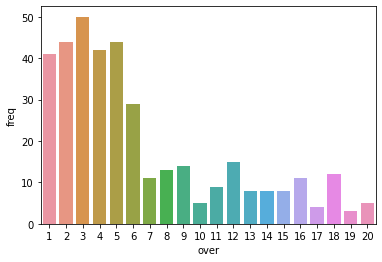

In [10]:
# sns.barplot(x = 'over', y = 'freq', data=gayle6)
sns.barplot(x = 'over', y = 'freq', data=gayle4)
 
# Show the plot
plt.show()

In [41]:
df2 = per_over_avg_run()  # Change name of variable
df2

,Per Over Average Run
Over,
1,12
2,14
3,16
4,16
5,16
6,16
7,13
8,14
9,14


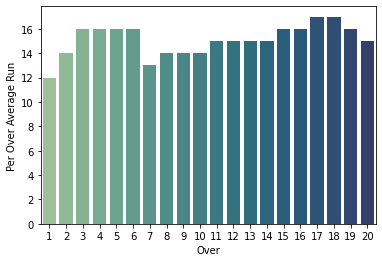

In [40]:
sns.barplot(x = df.index, y = 'Per Over Average Run', data=df2, palette= 'crest')
 
# Show the plot
plt.show()

# Data Preparation and Cleaning

# Exploratory Analysis and Visualization

# Questions and Answers

# Infrences and Conclusions

# Refrences and Future Work